In [37]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma, gammainc
import scipy.constants as const
import matplotlib.pyplot as plt

In [38]:
# Value
#kpc = 3.086e+19
kpc = 1

L = 50 * kpc
M_sol = 1.9884e30

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992e9 * M_sol / kpc**3
n = 0.43

# Value of c
c = 3e5
#c = const.c

# Value of G
G = 4.30091e-6 / M_sol
#G = const.G 

pi = np.pi

In [39]:
# Halo density formula
def rho(x, l):
    return rho_0 * np.exp(-(l * x /R_h)**(1/n)) 

# M'(x)
def M_(x, l):
    return 4 * pi * l**3  *  rho(x, l) * x**2


# Mass formula
def int(x, l):
    return G * (M_(x, l) * (x - np.log(x))) / (c**2 * l)

In [40]:
l_value = np.arange(8.5, 50, 0.5)


int_val = []

for k in l_value:
    l = k * kpc
    res, er = quad(int, R_0/l, 1, args=(l,))

    result = (res) 
    
    int_val.append(result)
    
int_val = np.array(int_val)

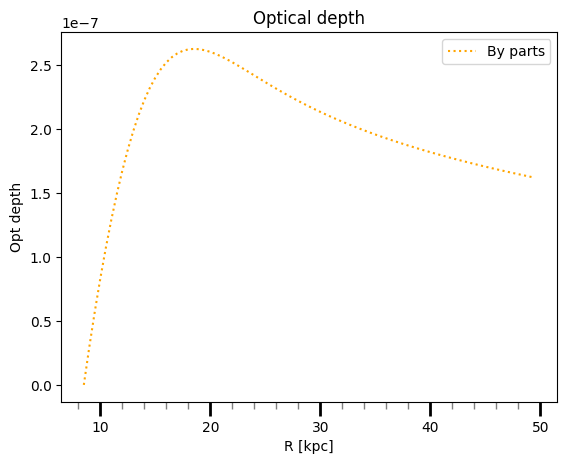

In [41]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val, label = 'By parts', color = 'orange', linestyle = ':')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

# Show the grid
ax.grid(False, which='both')
plt.legend()

# Display the plot
plt.show()

In [42]:
a = quad(int, R_0/L, 1, args=(L,))

print(a)

(1.6095722358011687e-07, 2.317665217507026e-13)
